In [1]:
import geatpy as ea
import numpy as np


gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   20   | 3.05768E+00 | 1.82778E+01 | 1.06677E+01 | 3.05768E+00 | 7.61007E+00 
 1 |   40   | 2.90183E+00 | 1.82778E+01 | 1.05945E+01 | 2.90183E+00 | 7.58952E+00 
 2 |   60   | 1.90183E+00 | 1.82778E+01 | 9.86400E+00 | 1.90183E+00 | 7.55880E+00 
 3 |   80   | 1.90183E+00 | 1.76573E+01 | 5.63394E+00 | 1.90183E+00 | 5.90138E+00 
 4 |  100   | 1.82000E+00 | 2.90183E+00 | 2.09491E+00 | 1.82000E+00 | 3.47269E-01 
 5 |  120   | 1.82000E+00 | 1.90183E+00 | 1.88278E+00 | 1.82000E+00 | 3.34636E-02 
 6 |  140   | 1.80325E+00 | 1.90181E+00 | 1.84809E+00 | 1.80325E+00 | 3.68674E-02 
 7 |  160   | 1.80325E+00 | 1.82000E+00 | 1.81832E+00 | 1.80325E+00 | 5.02497E-03 
 8 |  180   | 1.79051E+00 | 1.82000E+00 | 1.81510E+00 | 1.79051E+00 | 8.69739E-03 
 9 |  200   | 1.01675E+00 | 1.81999E+00 | 1.72702E+00 | 1.01675E+00 | 2.37279E-01 


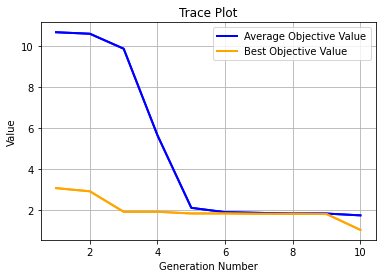

Execution time: 0.021691322326660156 s
Evaluation number: 200
The best objective value is: 1.0167464696428106
The best variables are: 
1.0	1.1294081513769925	2.0	1.0	1.0	
{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the generation limit.', 'optPop': <geatpy.Population.Population object at 0x7ff0f943f550>, 'lastPop': <geatpy.Population.Population object at 0x7ff0f8362ac0>, 'Vars': array([[1.        , 1.12940815, 2.        , 1.        , 1.        ]]), 'ObjV': array([[1.01674647]]), 'CV': array([[ 0.        , -0.98325353]]), 'executeTime': 0.021691322326660156, 'nfev': 200, 'startTime': '2022-04-22 21h-51m-59s', 'endTime': '2022-04-22 21h-51m-59s'}


In [3]:
# 构建问题
r = 1  # 目标函数需要用到的额外数据


@ea.Problem.single
def evalVars(Vars):  # 定义目标函数（含约束）
    f = np.sum((Vars - r) ** 2)  # 计算目标函数值
    x1 = Vars[0]
    x2 = Vars[1]
    CV = np.array([(x1 - 0.5)**2 - 0.25,
                   (x2 - 1)**2 - 1])  # 计算违反约束程度
    return f, CV


problem = ea.Problem(name='soea quick start demo',
                     M=1,  # 目标维数
                     maxormins=[1],  # 目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标
                     Dim=5,  # 决策变量维数
                     varTypes=[0, 0, 1, 1, 1],  # 决策变量的类型列表，0：实数；1：整数
                     lb=[-1, 1, 2, 1, 0],  # 决策变量下界
                     ub=[1, 4, 5, 2, 1],  # 决策变量上界
                     evalVars=evalVars)
# 构建算法
algorithm = ea.soea_SEGA_templet(problem,
                                 ea.Population(Encoding='RI', NIND=20),
                                 MAXGEN=50,  # 最大进化代数。
                                 logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
                                 trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
                                 maxTrappedCount=10)  # 进化停滞计数器最大上限值。
# 求解
res = ea.optimize(algorithm, seed=1, verbose=True, drawing=1, outputMsg=True, drawLog=False, saveFlag=False)
print(res)


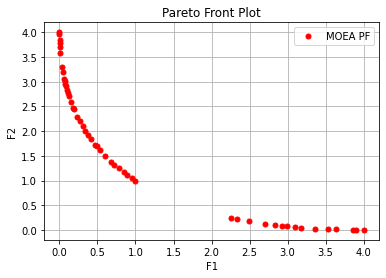

Execution time: 0.3710014820098877 s
Evaluation number: 15000
The number of non-dominated solutions is: 50
hv: 0.83038
spacing: 0.03951
{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the generation limit.', 'optPop': <geatpy.Population.Population object at 0x7f7ee8bf8c10>, 'lastPop': <geatpy.Population.Population object at 0x7f7ee8c5ed00>, 'Vars': array([[ 3.32608258e-01],
       [ 1.97532154e+00],
       [ 3.87734827e-01],
       [ 3.53322052e-01],
       [ 4.27660950e-01],
       [ 1.68189400e+00],
       [ 1.78060433e+00],
       [ 7.72809388e-01],
       [ 5.48127997e-02],
       [ 5.17416390e-01],
       [ 2.61258372e-01],
       [ 6.85180287e-01],
       [ 7.29296114e-01],
       [ 9.18191099e-01],
       [ 1.96382009e+00],
       [ 6.42219891e-01],
       [ 2.13598085e-01],
       [ 3.17794115e-01],
       [ 1.57839795e+00],
       [ 9.74114396e-01],
       [ 7.72396741e-02],
       [ 8.50456483e-01],
       [ 1.03082598e-02],
       [ 1.87749264e+00],
 

In [18]:
class MyProblem(ea.Problem):  # 继承Problem父类
    def __init__(self):
        name = 'MyProblem'  # 初始化name（函数名称，可以随意设置）
        M = 2  # 优化目标个数
        maxormins = [1] * M  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 1  # 初始化Dim（决策变量维数）
        varTypes = [0]  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [-10]  # 决策变量下界
        ub = [10]  # 决策变量上界
        lbin = [1]  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1]  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)

    def evalVars(self, Vars):  # 目标函数
        f1 = Vars ** 2
        f2 = (Vars - 2) ** 2
        ObjV = np.hstack([f1, f2])  # 计算目标函数值矩阵
        CV = -Vars ** 2 + 2.5 * Vars - 1.5  # 构建违反约束程度矩阵
        return ObjV, CV

# 实例化问题对象
problem = MyProblem()
# 构建算法
algorithm = ea.moea_NSGA2_templet(problem,
                                    ea.Population(Encoding='RI', NIND=50),
                                    MAXGEN=300,  # 最大进化代数
                                    logTras=0)  # 表示每隔多少代记录一次日志信息，0表示不记录。
# 求解
res = ea.optimize(algorithm, seed=1, verbose=True, drawing=1, outputMsg=True, drawLog=False, saveFlag=True)
print(res)
